# 4.9 TASK: Part 2 Intro to Data Visualization with Python

## Summary of this Script: Part 2
#### Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9

### Q1

In [13]:
# import the necessary analysis and visualization libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [15]:
path = r"C:\Users\wallm\11 2024 Instacart Basket Analysis 1"

In [11]:
path

'C:\\Users\\wallm\\11 2024 Instacart Basket Analysis 1'

In [17]:
# Import data from Part 1
ords_prods_cust_agg_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_agg_merge.pkl'))

### Q2

#### follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

##### Completed in file 4.9: Exercise Intro to Data Visualization with Python (attached)

### Q3

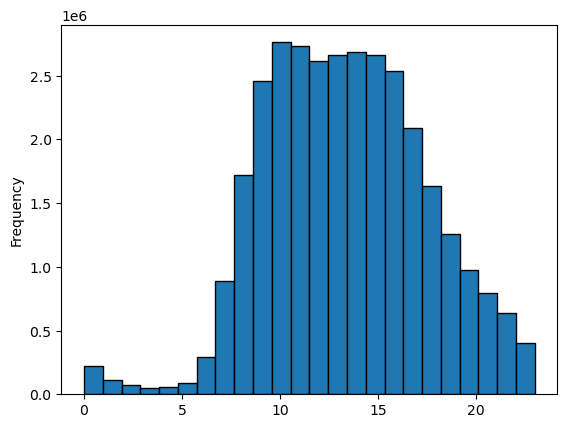

In [28]:
# Create a histogram of the “order_hour_of_day” column.
hist = ords_prods_cust_agg_merge['order_hour_of_day'].plot.hist(bins = 24, edgecolor='black')

##### The histogram demonstrates the distribution of orders placed during each hour of the day on Instacart.
##### A sharp increase in orders starts in the early morning hours.
##### The peak ordering period occurs between 11 AM and 3 PM, indicating high customer activity during late morning and early afternoon.
##### There are significantly fewer orders during the night, particularly between 12 AM and 6 AM, as expected when most people are asleep.
##### After the peak, the number of orders gradually declines from the afternoon to the evening, stabilizing before midnight.

##### I believe 24 bins are ideal for this histogram since there are 24 hours in a day, and each bin represents one hour. This allows for clear and intuitive visualization of hourly order frequencies. Using fewer bins (e.g., 12 or 6) would group multiple hours together, making the pattern less granular. I've also added black edging to highlight each bin for easier reading for the senior stakeholders.

### Q4

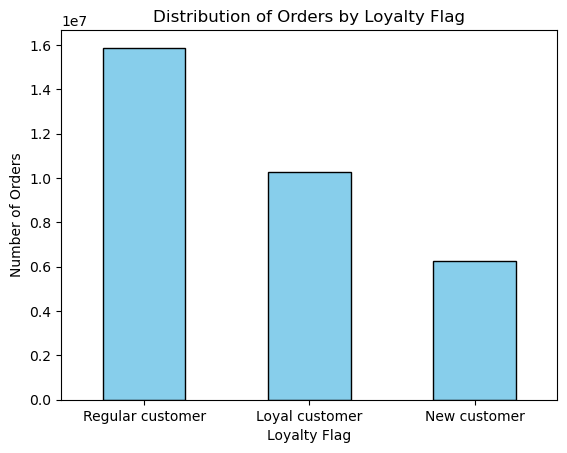

In [125]:
# Create a bar chart from the “loyalty_flag” column.
bar = ords_prods_cust_agg_merge['loyalty_flag'].value_counts().plot.bar(color='skyblue', edgecolor='black')

# Customize the chart
plt.title('Distribution of Orders by Loyalty Flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

##### The bar chart will display's the number of orders for each loyalty category (e.g., "Loyal Customer," "Regular Customer," "New Customer"). This visualization will help the marketing team understand the proportion of orders attributed to each type of customer loyalty.

##### The resources listed below, taken from the end of the exercise collectively helped provide me insights into how and why these customizations improve chart readability and make visualizations more professional and impactful, i.e. to customize the chart.
##### https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
##### https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
##### https://medium.com/plotly/maximizing-the-data-ink-ratio-in-dashboards-and-slide-deck-7887f7c1fab

### Q5

In [39]:
# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

# Creating these samples requires a list of random floating numbers between 0 and 1, ensures reproducibility of the sampling
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_agg_merge)) <= 0.7

In [41]:
# Store 70% of the sample in the dataframe big
big = ords_prods_cust_agg_merge[dev]

In [43]:
# Store 30% of the sample in the dataframe small
small = ords_prods_cust_agg_merge[~dev]

In [47]:
# Check total rows
len(ords_prods_cust_agg_merge)

32404859

In [51]:
# Check both samples together equal the same total rows
len(big) + len(small)

32404859

In [59]:
#  let’s do something that will speed up the processing time even further

# This creates a new dataframe, df_2, that contains only the “prices” and “orders_day_of_week” columns from your small subset.
df_2 = small[['order_hour_of_day','prices']]

In [61]:
df_2

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0
...,...,...
32404841,12,3.8
32404842,12,5.9
32404843,12,3.7
32404849,12,3.2


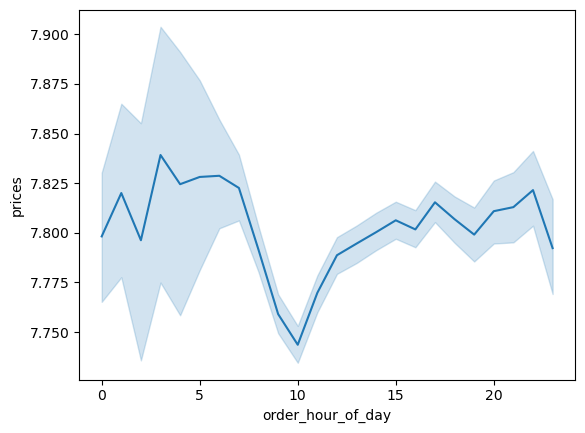

In [63]:
# Create the line chart for the difference in expenditure (the “prices” column) depending on the hour of the day
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

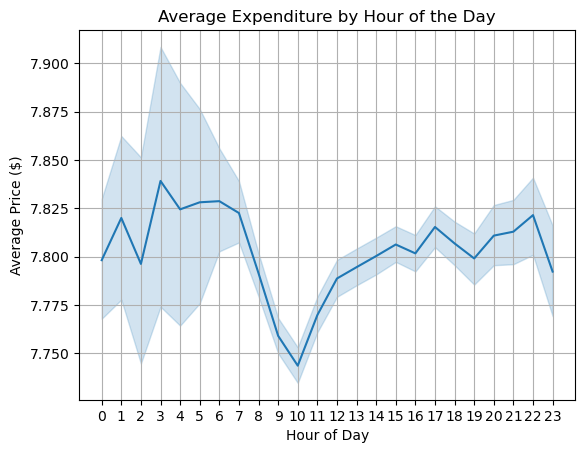

In [67]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

# Customize the chart to improve chart readability and make visualizations more professional and impactful for the stakeholders
plt.title('Average Expenditure by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all 24 hours are visible
plt.show()

#### Insights:
##### Peak Spending: Customers tend to spend more on average during the early hours (1–3 AM) and show another increase during afternoon to evening hours.
##### Lowest Spending: The dip around 9–10 AM may indicate smaller, routine purchases during this period.

### Q6

In [75]:
# determine any connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

ords_prods_cust_agg_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   order_number           int64   
 3   orders_day_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_since_last_order  float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   product_name           object  
 10  aisle_id               int64   
 11  department_id          int64   
 12  prices                 float64 
 13  Match                  category
 14  busiest_day            object  
 15  busiest_period_of_day  object  
 16  max_order              int64   
 17  loyalty_flag           object  
 18  average_spend          float64 
 19  spender_flag           object  
 20  order_median_gap       float64 
 21  customer_frequency     object

In [79]:
# Create a small subset 
df_3 = small[['age', 'num_dependents']]

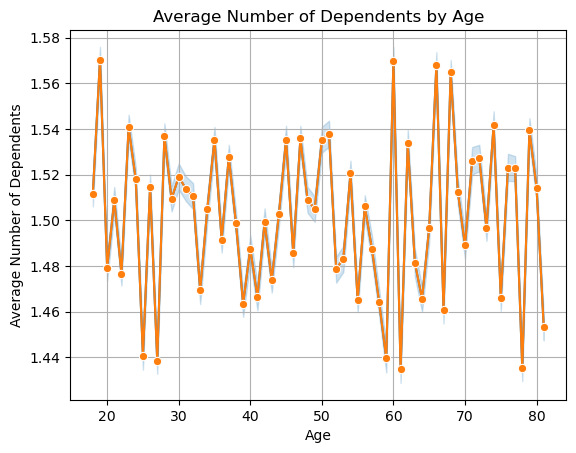

In [133]:
# Create line chart to view any connection between age and family situation between age and number of dependents
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'num_dependents')

# Create a cleaner line chart
sns.lineplot(data=line_age_dep, x='age', y='num_dependents', marker='o')
plt.title('Average Number of Dependents by Age')
plt.xlabel('Age')
plt.ylabel('Average Number of Dependents')
plt.grid(True)
plt.show()

#### The line graph illustrates the relationship between age and the average number of dependents for customers:

##### The average number of dependents remains relatively stable across most age groups, hovering around 1.48 to 1.52 dependents, but there is no clear upward or downward trend across the age range.
##### Younger age groups (20–30) show slightly more variability in the average number of dependents.
##### Ages around 60 and 70 exhibit a decrease in the average number of dependents, potentially indicating fewer dependents for older individuals.
##### Spikes and dips at specific ages (e.g., 40, 60, 80) may suggest outliers or irregularities in the dataset (potential for further investigation may be needed).

##### Ultimately, there doesn’t appear to be a strong correlation between age and the number of dependents, as the average remains fairly consistent.

##### Marketing strategies targeting families could focus on younger and middle-aged groups, as they maintain a stable average number of dependents.

### Q7

In [89]:
# Explore whether there’s a connection between age and spending power (income), create a scatterplot.

# Create a small subset 
df_4 = small[['age','income']]

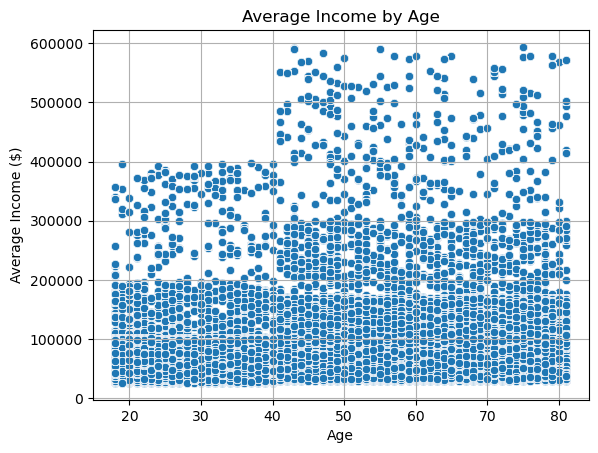

In [91]:
# Create the scatterplot
scatterplot = sns.scatterplot(data = df_4, x = 'age', y = 'income')
plt.title('Average Income by Age')
plt.xlabel('Age')
plt.ylabel('Average Income ($)')
plt.grid(True)
plt.show()

#### The scatterplot illustrates the relationship between age and income:

##### The majority of incomes are concentrated below 200k, regardless of age
##### There is no significant upward or downward trend in income with respect to age, indicating a weak or non-linear relationship.

##### Younger individuals (under 40) tend to have lower incomes, with a dense concentration below 100k. 
##### Incomes 400k appear sporadically across all ages but are more evenly distributed.
##### After age 40, higher incomes above 200k become more common, but below this remains the largest concentration.

##### Older individuals, particularly those above 40, have more representation in medium-to-high income ranges, offering opportunities for premium product marketing.

##### Ultimately, this scatterplot highlights that while income generally increases slightly with age, the majority of individuals have lower incomes. 

### Q8

In [108]:
# Export Histogram visualizations as 'png'
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [127]:
# Export Bar chart visualizations as 'png'
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'), dpi=300)

In [110]:
# Export Line chart visualizations as 'png'
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expend_over_hours_of_day.png'))

In [135]:
# Export Line chart line_age_dep visualizations as 'png'
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_and_depend.png'), dpi=300)

In [115]:
# Export scatterplot visualizations as 'png'
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_spend_power.png'))

### Q9

#### Save your notebook from part 2 of this Exercise’s task.